In [47]:
import mlflow
from mlflow.tracking import MlflowClient

print(f"tracking URI: '{mlflow.get_tracking_uri()}'")

client = MlflowClient()

# Use the search_experiments function to get a list of available experiments
experiments = client.search_experiments()
print(len(experiments))

# Display the list of available experiments
for experiment in experiments:
    print(f"Experiment Name: {experiment.name}, Experiment ID: {experiment.experiment_id}")

tracking URI: 'file:///Users/mohammedzaidsyed/Desktop/Diamond/MLOPS_Diamond/mlruns'
2
Experiment Name: diamonds_price_predictor, Experiment ID: 779128597837821808
Experiment Name: Default, Experiment ID: 0


Loading Data

In [11]:
import pandas as pd
def load_data(path):
    return pd.read_csv(path)

df = load_data('Data/diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,b'Ideal',b'E',b'SI2',61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,b'Premium',b'E',b'SI1',59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,b'Good',b'E',b'VS1',56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,b'Premium',b'I',b'VS2',62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,b'Good',b'J',b'SI2',63.3,58.0,335.0,4.34,4.35,2.75


Cleaning Data

In [20]:
# Check for missing values
print(df.isnull().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
'x'        0
'y'        0
'z'        0
dtype: int64


In [21]:
# Remove any duplicate rows
df = df.drop_duplicates()

In [22]:
# Remove any rows with missing values
df = df.dropna()

In [23]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', ''x'',
       ''y'', ''z''],
      dtype='object')

In [24]:
df.shape

(53794, 10)

In [25]:
df.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
'x'          554
'y'          552
'z'          375
dtype: int64

In [26]:
df.describe()

,carat,depth,table,price,'x','y','z'
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  float64
 7   'x'      53794 non-null  float64
 8   'y'      53794 non-null  float64
 9   'z'      53794 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.5+ MB


In [30]:
# Print out unique values in each categorical column
print("Unique values in 'cut' column:", df['cut'].unique())
print("Unique values in 'color' column:", df['color'].unique())
print("Unique values in 'clarity' column:", df['clarity'].unique())

Unique values in 'cut' column: ["b'Ideal'" "b'Premium'" "b'Good'" "b'Very Good'" "b'Fair'"]
Unique values in 'color' column: ["b'E'" "b'I'" "b'J'" "b'H'" "b'F'" "b'G'" "b'D'"]
Unique values in 'clarity' column: ["b'SI2'" "b'SI1'" "b'VS1'" "b'VS2'" "b'VVS2'" "b'VVS1'" "b'I1'" "b'IF'"]


Visualization

/Users/mohammedzaidsyed/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1000 with 0 Axes>

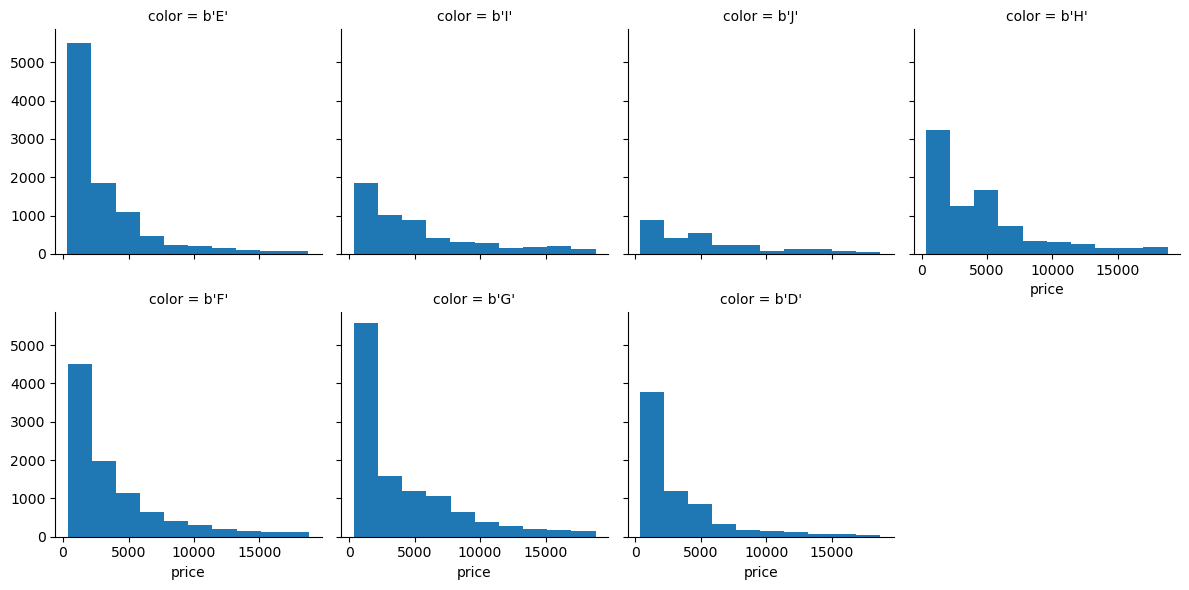

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 10))
graph = sns.FacetGrid(df, col = 'color', col_wrap = 4)
graph.map(plt.hist, 'price', bins = 10)


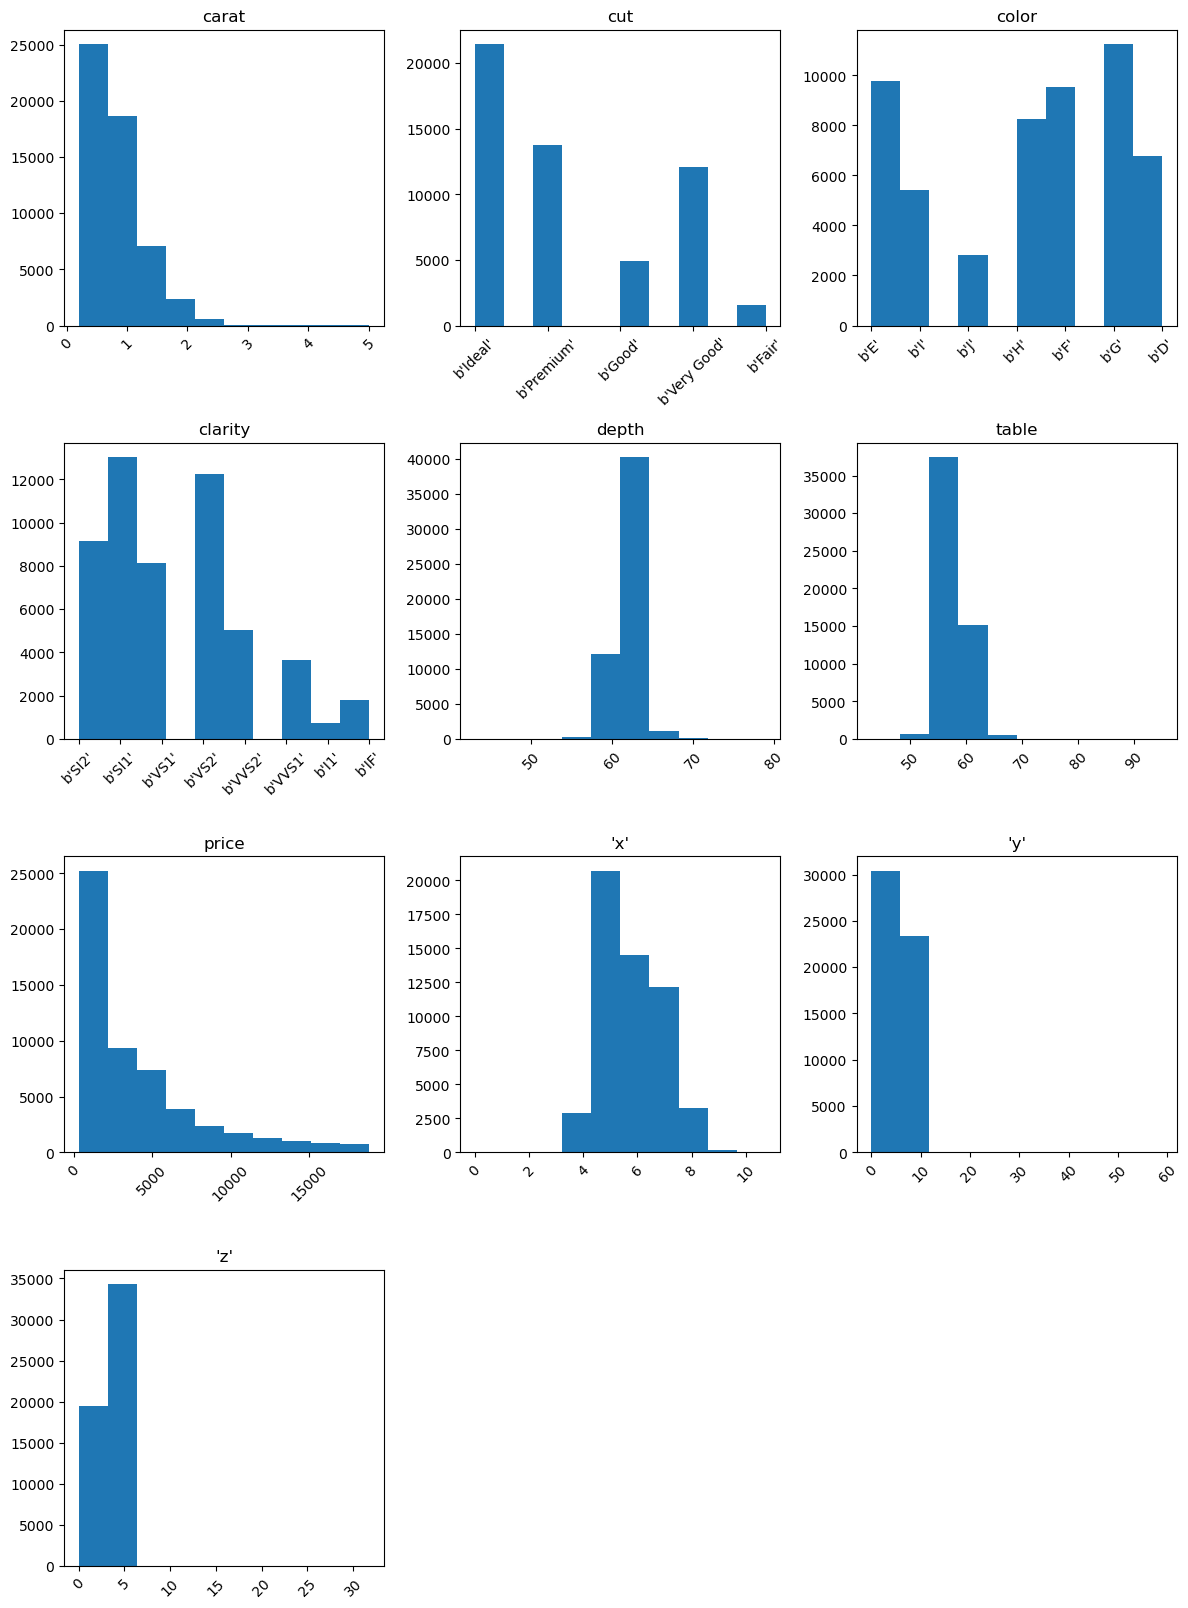

In [29]:
lista_colunas = list(df.columns)
plt.figure(figsize = (12,20))
for i in range(len(lista_colunas)):
    plt.subplot(5, 3, i + 1)
    plt.title(lista_colunas[i])
    plt.xticks(rotation = 45)
    plt.hist(df[lista_colunas[i]])
    
plt.tight_layout()

The below bar charts will show the number of diamonds in each category, which will help us understand why these variables are considered categorical:

cut: The quality of the cut is a categorical variable because it describes the cut quality of the diamond in ordered categories such as 'Ideal', 'Premium', 'Good', etc.

color: The color of the diamond is a categorical variable because it is rated on a scale from D (best) to J (worst), representing discrete groups.

clarity: The clarity of the diamond is a categorical variable because it describes the level of flaws in the diamond using categories like 'SI1', 'VS1', 'VVS2', etc.


These visualizations will show that each of these variables contains a limited number of distinct categories, which is a characteristic of categorical variables.

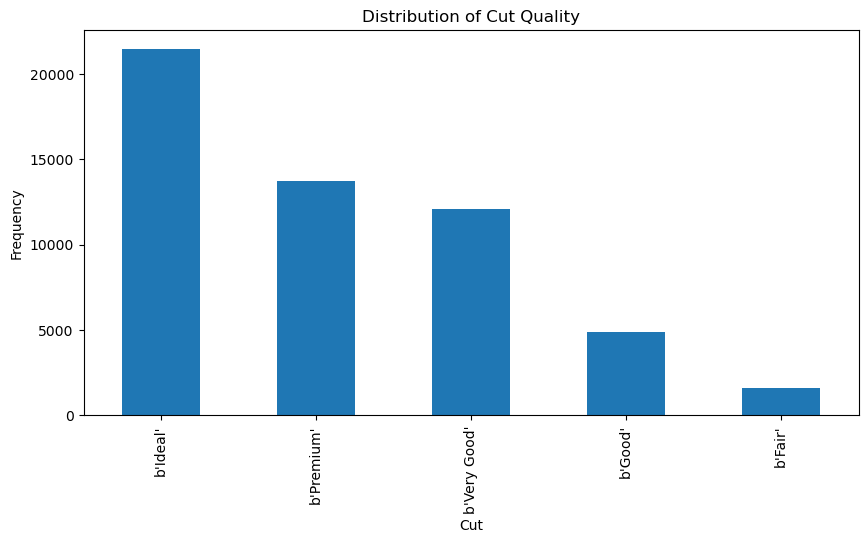

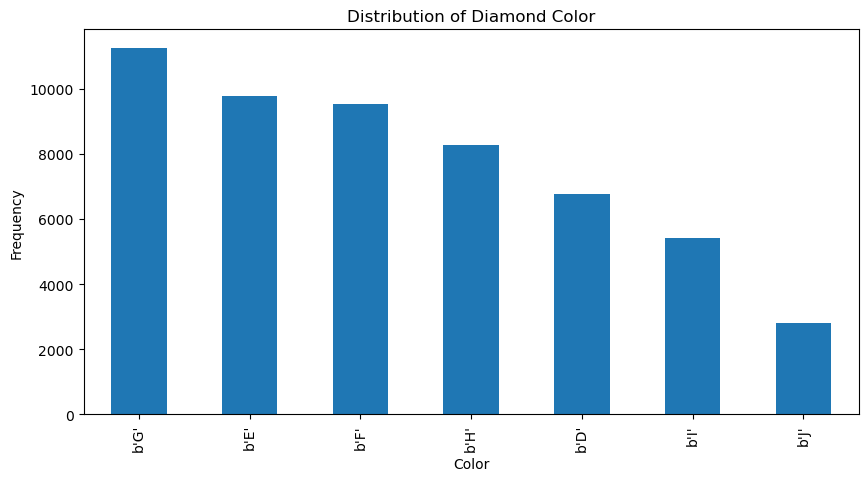

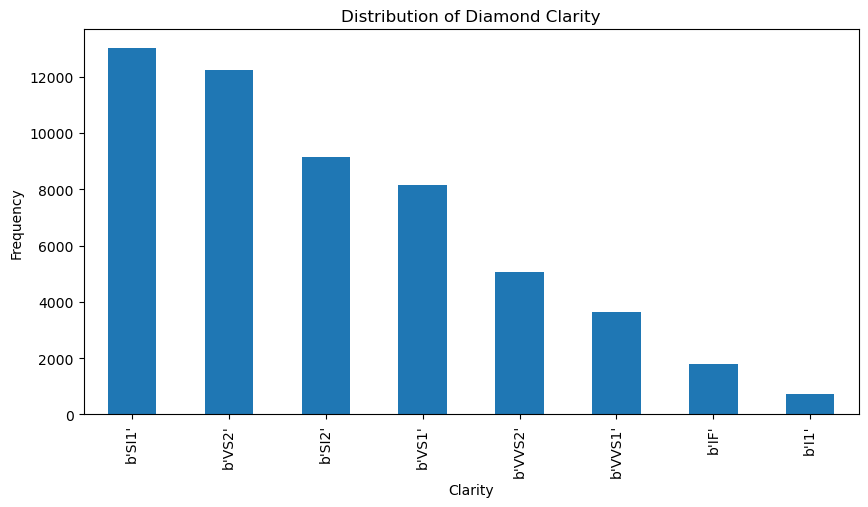

In [31]:
# Plotting the distribution of 'cut'
plt.figure(figsize=(10, 5))
df['cut'].value_counts().plot(kind='bar')
plt.title('Distribution of Cut Quality')
plt.xlabel('Cut')
plt.ylabel('Frequency')
plt.show()

# Plotting the distribution of 'color'
plt.figure(figsize=(10, 5))
df['color'].value_counts().plot(kind='bar')
plt.title('Distribution of Diamond Color')
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.show()

# Plotting the distribution of 'clarity'
plt.figure(figsize=(10, 5))
df['clarity'].value_counts().plot(kind='bar')
plt.title('Distribution of Diamond Clarity')
plt.xlabel('Clarity')
plt.ylabel('Frequency')
plt.show()

In [37]:
CATEGORICAL_COLS = ["cut", "color", "clarity"]

In [39]:
from typing import List
from sklearn.feature_extraction import DictVectorizer

def encode_cols(df: pd.DataFrame, categorical_cols: List[str] = None) -> pd.DataFrame:
    if categorical_cols is None:
        categorical_cols = ["cut", "color", "clarity"]
        
    df[categorical_cols] = df[categorical_cols].apply(lambda x: x.astype(str).str.lower())
    return df


def extract_x_y(
    df: pd.DataFrame,
    categorical_cols: List[str] = None,
    dv: DictVectorizer = None,
    with_target: bool = True,
) -> dict:
    if categorical_cols is None:
         categorical_cols = ["cut", "color", "clarity"]
    dicts = df[[*categorical_cols]].to_dict(orient="records")

    y = None
    if with_target:
        if dv is None:
            dv = DictVectorizer()
            dv.fit(dicts)
        y = df["price"].values

    x = dv.transform(dicts)
    return x, y, dv

# save the preprocessor into saved_pkl folder
import pickle
def save_picked(path: str, file):
    with open(path, "wb") as f:
        pickle.dump(file, f)

In [40]:
from sklearn.model_selection import train_test_split
# try all steps
df = load_data('data/diamonds.csv')
df.to_csv("data/diamonds.csv", index=False)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df.to_csv("data/train-set.csv")
test_df.to_csv("data/test-set.csv")
train_df = encode_cols(train_df)
test_df = encode_cols(test_df)
X_train, y_train, dv = extract_x_y(train_df)
X_test, y_test, _ = extract_x_y(test_df, dv=dv)

In [42]:
import mlflow
import mlflow.sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from typing import List

# Set the experiment name
mlflow.set_experiment("diamonds_price_predictor")

# Check if there's an active run, and end it if necessary
if mlflow.active_run():
    mlflow.end_run()

# Start a run
with mlflow.start_run() as run:
    run_id = run.info.run_id

    # Set tags for the run
    mlflow.set_tag("experiment_id", run_id)

    # Load data - assuming you have functions to load your data
    train_df = load_data("data/train-set.csv")
    test_df = load_data("data/test-set.csv")

    # Preprocess the text data
    train_text = train_df[['cut', 'color', 'clarity']].apply(lambda x: ' '.join(x), axis=1).tolist()
    test_text = test_df[['cut', 'color', 'clarity']].apply(lambda x: ' '.join(x), axis=1).tolist()


    # Vectorize the text data
    vectorizer = TfidfVectorizer()
    X_train = vectorizer.fit_transform(train_text)
    X_test = vectorizer.transform(test_text)

    y_train = train_df['price']
    y_test = test_df['price']

    # Train a regression model
    model = RandomForestRegressor(random_state=0)
    model.fit(X_train, y_train)

    # Evaluate the model
    y_train_pred = model.predict(X_train)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    mlflow.log_metric("train_mae", train_mae)
    mlflow.log_metric("train_mse", train_mse)
    mlflow.log_metric("train_r2", train_r2)

    print("Train MAE:", train_mae)
    print("Train MSE:", train_mse)
    print("Train R2:", train_r2)

    y_test_pred = model.predict(X_test)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    mlflow.log_metric("test_mae", test_mae)
    mlflow.log_metric("test_mse", test_mse)
    mlflow.log_metric("test_r2", test_r2)

    print("Test MAE:", test_mae)
    print("Test MSE:", test_mse)
    print("Test R2:", test_r2)

    # Log the model
    mlflow.sklearn.log_model(model, "model")

    # Register the model in MLflow Model Registry
    model_name = "diamond_price_predictor_v1"
    model_description = "Diamond Price Predictor"
    mlflow.register_model("runs:/{}/model".format(run_id), model_name)

Train MAE: 2928.5336107238295
Train MSE: 15328604.510588175
Train R2: 0.037132156682938566
Test MAE: 2912.8708630063256
Test MSE: 15251990.182926362
Test R2: 0.04056353468587015


/Users/mohammedzaidsyed/anaconda3/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Successfully registered model 'diamond_price_predictor_v1'.
Created version '1' of model 'diamond_price_predictor_v1'.


In [43]:
from mlflow.tracking import MlflowClient

# Initialize MLflow tracking client
client = MlflowClient()

# Set the correct model type and experiment path
model_type = "random_forest_regressor"
mlflow_experiment_path = 'diamond_price_predictor_v1'

# Specify the version of the model to be transitioned
production_version = 1

# Transition the specified model version to the "Production" stage
client.transition_model_version_stage(name=mlflow_experiment_path, version=production_version, stage="Production")

/var/folders/5r/9zpf96f977d87960ftjtdkgc0000gn/T/ipykernel_42039/136919919.py:14: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/2.9.2/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(name=mlflow_experiment_path, version=production_version, stage="Production")


<ModelVersion: aliases=[], creation_timestamp=1707661295624, current_stage='Production', description=None, last_updated_timestamp=1707662217754, name='diamond_price_predictor_v1', run_id='558ffabccf9a42529a05219ce7558e58', run_link=None, source='file:///Users/mohammedzaidsyed/Desktop/Diamond/MLOPS_Diamond/mlruns/779128597837821808/558ffabccf9a42529a05219ce7558e58/artifacts/model', status='READY', status_message=None, tags={}, user_id=None, version=1>

In [44]:
!mlflow ui --host 0.0.0.0 --port 5002

[2024-02-11 15:37:45 +0100] [14664] [INFO] Starting gunicorn 21.2.0
[2024-02-11 15:37:45 +0100] [14664] [INFO] Listening at: http://0.0.0.0:5002 (14664)
[2024-02-11 15:37:45 +0100] [14664] [INFO] Using worker: sync
[2024-02-11 15:37:45 +0100] [14665] [INFO] Booting worker with pid: 14665
[2024-02-11 15:37:45 +0100] [14666] [INFO] Booting worker with pid: 14666
[2024-02-11 15:37:45 +0100] [14667] [INFO] Booting worker with pid: 14667
[2024-02-11 15:37:45 +0100] [14669] [INFO] Booting worker with pid: 14669
^C
[2024-02-11 15:38:34 +0100] [14664] [INFO] Handling signal: int
[2024-02-11 15:38:34 +0100] [14665] [INFO] Worker exiting (pid: 14665)
[2024-02-11 15:38:34 +0100] [14667] [INFO] Worker exiting (pid: 14667)
[2024-02-11 15:38:34 +0100] [14669] [INFO] Worker exiting (pid: 14669)
[2024-02-11 15:38:34 +0100] [14666] [INFO] Worker exiting (pid: 14666)


In [45]:
import pickle

def save_pickle(file, path):
    """
    Save the file using pickle.
    
    Parameters:
        file: Any - The object to be saved.
        path: str - The path to save the file.
    """
    with open(path, "wb") as f:
        pickle.dump(file, f)

# Example usage:
save_pickle(model, "/Users/mohammedzaidsyed/Desktop/Diamond/MLOPS_Diamond/Model_savedpkl/Model_v/model.pkl")
save_pickle(dv, "/Users/mohammedzaidsyed/Desktop/Diamond/MLOPS_Diamond/Model_savedpkl/dv_v/dv.pkl")

In [46]:
# from config import PATH_TO_MODEL, PATH_TO_PREPROCESSOR
# Load production model
model_uri = f"models:/{mlflow_experiment_path}/production"
model = mlflow.sklearn.load_model(model_uri)
save_picked("/Users/mohammedzaidsyed/Desktop/Diamond/MLOPS_Diamond/Model_savedpkl/Model_v/model.pkl", model)

def load_pickle(path):
    with open(path, "rb") as f:
        file = pickle.load(f)
    return file

dv = load_pickle("/Users/mohammedzaidsyed/Desktop/Diamond/MLOPS_Diamond/Model_savedpkl/dv_v/dv.pkl")
model = load_pickle("/Users/mohammedzaidsyed/Desktop/Diamond/MLOPS_Diamond/Model_savedpkl/Model_v/model.pkl")

/Users/mohammedzaidsyed/anaconda3/lib/python3.11/site-packages/mlflow/store/artifact/utils/models.py:32: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/2.9.2/model-registry.html#migrating-from-stages
  latest = client.get_latest_versions(name, None if stage is None else [stage])
